# FOLD 1

In [2]:
import numpy as np
import pandas as pd
#import matplotlib.pyplot as plt
#import seaborn as sns

In [3]:
f1=pd.read_csv('fold_1_csv.csv')
print(f1.head())
print(f1.describe())
print(f1.info())

         x1        x2        x3        x4        x5        x6        x7  \
0  0.053200  0.023256  0.064626  0.000000  0.071895  0.666667  0.378378   
1  0.006875  0.000000  0.030612  0.032609  0.077342  1.000000  0.459459   
2  0.015282  0.767442  0.088435  0.652174  0.399782  0.333333  0.702703   
3  0.002147  0.802326  0.911565  0.467391  0.993464  0.666667  0.891892   
4  0.013396  0.662791  0.142857  0.597826  0.265795  0.666667  0.702703   

         x8        x9       x10 Target_Class  
0  0.053195  0.104167  0.000000       Bronze  
1  0.006703  0.000000  0.057143       Bronze  
2  0.005828  0.364583  0.400000       Bronze  
3  0.002520  0.354167  0.757143     Platinum  
4  0.013041  0.031250  0.300000       Bronze  
               x1          x2          x3          x4          x5          x6  \
count  364.000000  364.000000  364.000000  364.000000  364.000000  364.000000   
mean     0.025875    0.822706    0.244384    0.624313    0.603698    0.505411   
std      0.089937    0.2

# KNN

In [4]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
p=scaler.fit(f1.drop('Target_Class',axis=1))


In [7]:
scaled_dt=scaler.transform(f1.drop('Target_Class',axis=1))
#scaled_dt=scaler.transform(p)

In [5]:
fin_dt=pd.DataFrame(scaled_dt,columns=f1.columns[:-1])
fin_dt.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
0,0.304244,-3.366373,-0.819459,-2.716488,-2.305991,0.607504,-1.300460,0.328421,-1.004941,-3.189300
1,-0.211545,-3.464300,-0.974518,-2.574601,-2.282372,1.863279,-0.851488,-0.191101,-1.280041,-2.841253
2,-0.117940,-0.232710,-0.710921,0.121227,-0.884216,-0.648275,0.495432,-0.200879,-0.317196,-0.752983
3,-0.264187,-0.085819,3.041464,-0.682794,1.690091,0.607504,1.543033,-0.237844,-0.344704,1.422301
4,-0.138939,-0.673381,-0.462829,-0.115250,-1.465207,0.607504,0.495432,-0.120277,-1.197511,-1.362062


In [6]:
x1=fin_dt
y1=f1['Target_Class']
from sklearn.model_selection import train_test_split
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.2,random_state=101)

In [7]:
from sklearn.neighbors import KNeighborsClassifier
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x1_train,y1_train)
    pred_i = knn.predict(x1_test)
    error_rate.append(np.mean(pred_i != y1_test))


Text(0,0.5,'Error Rate')

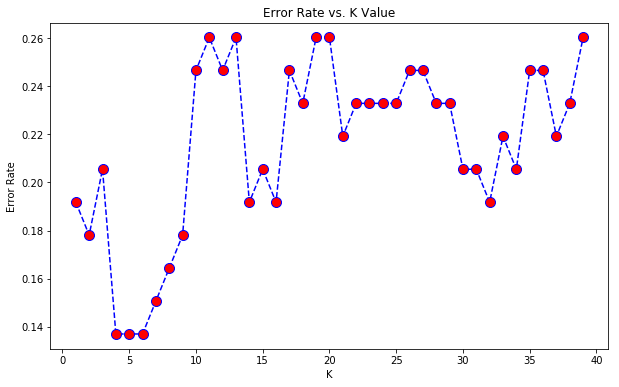

In [8]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [9]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x1_train,y1_train)
predictions_knn=knn.predict(x1_test)

# Training and Testing Data for other models

In [10]:
x=f1.drop('Target_Class',axis=1)
y=f1['Target_Class']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=101)

In [11]:
from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(y_test,predictions_knn))
print(classification_report(y_test,predictions_knn))

[[ 7  1  0  0]
 [ 0 17  3  0]
 [ 0  5 23  0]
 [ 0  0  1 16]]
              precision    recall  f1-score   support

           1       1.00      0.88      0.93         8
           2       0.74      0.85      0.79        20
           3       0.85      0.82      0.84        28
           4       1.00      0.94      0.97        17

   micro avg       0.86      0.86      0.86        73
   macro avg       0.90      0.87      0.88        73
weighted avg       0.87      0.86      0.87        73



# Decission Trees

In [12]:
from sklearn.tree import DecisionTreeClassifier
des_t=DecisionTreeClassifier()
des_t.fit(x_train,y_train)
predictions_des_t=des_t.predict(x_test)

In [13]:
print(confusion_matrix(y_test,predictions_des_t))
print(classification_report(y_test,predictions_des_t))

[[ 8  0  0  0]
 [ 0 20  0  0]
 [ 0  0 28  0]
 [ 0  0  0 17]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        28
           4       1.00      1.00      1.00        17

   micro avg       1.00      1.00      1.00        73
   macro avg       1.00      1.00      1.00        73
weighted avg       1.00      1.00      1.00        73



# Visualization

In [14]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(f1.columns[1:])
features

['x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'Target_Class']

In [15]:
dot_data = StringIO()  
export_graphviz(des_t, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

FileNotFoundError: [WinError 2] "dot.exe" not found in path.

# Random Forest

In [16]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [17]:
rfc_pred = rfc.predict(x_test)

In [18]:
print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))

[[ 8  0  0  0]
 [ 0 20  0  0]
 [ 0  0 28  0]
 [ 0  0  0 17]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        28
           4       1.00      1.00      1.00        17

   micro avg       1.00      1.00      1.00        73
   macro avg       1.00      1.00      1.00        73
weighted avg       1.00      1.00      1.00        73



# SVC

In [19]:
from sklearn.svm import SVC
svc = SVC(cache_size=80,gamma=0.7,kernel='rbf')
svc.fit(x_train,y_train)

SVC(C=1.0, cache_size=80, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.7, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [20]:
predictions_svc = svc.predict(x_test)

In [21]:
print(confusion_matrix(y_test,predictions_svc))
print(classification_report(y_test,predictions_svc))

[[ 6  2  0  0]
 [ 0 16  4  0]
 [ 0  5 22  1]
 [ 0  0  1 16]]
              precision    recall  f1-score   support

           1       1.00      0.75      0.86         8
           2       0.70      0.80      0.74        20
           3       0.81      0.79      0.80        28
           4       0.94      0.94      0.94        17

   micro avg       0.82      0.82      0.82        73
   macro avg       0.86      0.82      0.84        73
weighted avg       0.83      0.82      0.82        73



# SVM(After Scaling)

In [22]:
from sklearn.svm import SVC
svc = SVC(cache_size=200)
svc.fit(x1_train,y1_train)

C:\Users\Medha.Ch\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [23]:
predictions_svc = svc.predict(x1_test)

In [24]:
print(confusion_matrix(y1_test,predictions_svc))
print(classification_report(y1_test,predictions_svc))

[[ 6  2  0  0]
 [ 0 18  2  0]
 [ 0  4 24  0]
 [ 0  0  0 17]]
              precision    recall  f1-score   support

           1       1.00      0.75      0.86         8
           2       0.75      0.90      0.82        20
           3       0.92      0.86      0.89        28
           4       1.00      1.00      1.00        17

   micro avg       0.89      0.89      0.89        73
   macro avg       0.92      0.88      0.89        73
weighted avg       0.90      0.89      0.89        73



In [25]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
def svc_param_selection(x1_train, y1_train, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(svm.SVC(cache_size=200,kernel='rbf'), param_grid, cv=nfolds)
    grid_search.fit(x1_train, y1_train)
    grid_search.best_params_
    grid_search.best_params_=svc_param_selection(x1_train, y1_train, nfolds)
    response= grid_search.best_params_
    print(response)

In [36]:
from sklearn.model_selection import GridSearchCV

# create and fit a ridge regression model, testing each alpha
model = SVC(cache_size=200)
#Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
param_grid = {'gamma' : gammas}
grid = GridSearchCV(svm.SVC(cache_size=10,kernel='rbf'), param_grid, cv=10)
grid.fit(x_train, y_train)
print(grid)
# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_params_)

GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=10, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'gamma': [0.001, 0.01, 0.1, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)
0.8144329896907216
{'gamma': 1}


In [51]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

def sample_loss(params):
  C = params[0]
  gamma = params[1]

  # Sample C and gamma on the log-uniform scale
  mode = SVC(C=10 ** C, gamma=10 ** gamma, random_state=12345)

  # Sample parameters on a log scale
  return cross_val_score(model=mode,
                         X=x1_train,
                         y=y1_train,
                         scoring='roc_auc',
                         cv=3).mean()
result=sample_loss([10,20,30,40,50,60,70,80,90,100,0.001, 0.01, 0.1, 1])  

TypeError: cross_val_score() got an unexpected keyword argument 'model'

In [27]:
param_grid=[{'c':[1,10,100,1000],'kernel':['linear']},
           {'c':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']}]

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
tuned_params=[{'kernel':['rbf'],'gamma':[1e-3,1e-4],'c':[1,10,100,1000]},
             {'kernel':['linear'],'c':[1,10,100,1000]}]
clf=GridSearchCV(SVC(tuned_params,n_splits=5,scoring='f1_macro'))
clf.fit(x1_train,y1_train)


TypeError: __init__() got an unexpected keyword argument 'n_splits'

# Naive Bayes

In [25]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB


In [26]:
gnb = GaussianNB()
gnb.fit(x_train,y_train)
predictions_nb = gnb.predict(x_test)


In [27]:
print(confusion_matrix(y_test,predictions_nb))
print(classification_report(y_test,predictions_nb))

[[ 8  0  0  0]
 [ 3 17  0  0]
 [ 0 10 17  1]
 [ 0  0  1 16]]
             precision    recall  f1-score   support

          1       0.73      1.00      0.84         8
          2       0.63      0.85      0.72        20
          3       0.94      0.61      0.74        28
          4       0.94      0.94      0.94        17

avg / total       0.83      0.79      0.79        73



# LibSVM

In [28]:
from sklearn.svm import SVR

In [29]:
clf = SVR(gamma=0.7, C=30.0, epsilon=0.001)

In [33]:
clf.fit(x_train,y_train)
predictions_lib= clf.predict(x_test)

In [35]:
from sklearn import metrics

In [37]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions_lib))
print('MSE:', metrics.mean_squared_error(y_test, predictions_lib))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_lib)))

MAE: 0.23787544288066773
MSE: 0.09170027957370355
RMSE: 0.3028205402110358


# LibSVC

In [38]:
from sklearn.svm import LinearSVC

In [81]:
clf1 = LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=1e-05, verbose=0)

In [83]:
clf1.fit(x1_train,y1_train)
predictions_libSVC= clf1.predict(x1_test)
print(confusion_matrix(y1_test,predictions_libSVC))
print(classification_report(y1_test,predictions_libSVC))

[[ 7  1  0  0]
 [ 1 13  6  0]
 [ 0  7 19  2]
 [ 0  0  0 17]]
             precision    recall  f1-score   support

          1       0.88      0.88      0.88         8
          2       0.62      0.65      0.63        20
          3       0.76      0.68      0.72        28
          4       0.89      1.00      0.94        17

avg / total       0.77      0.77      0.76        73

